In [24]:
# Data Exploration: GSE93606
# Host-Microbial interactions in Idiopathic Pulmonary Fibrosis

import pandas as pd
import numpy as np
from pathlib import Path
import yaml
import os

# Get project root directory (parent of notebooks directory)
# This works whether running from project root or notebooks directory
if Path('config.yaml').exists():
    project_root = Path('.')
elif Path('../config.yaml').exists():
    project_root = Path('..')
else:
    # Try to find it by going up from current directory
    current = Path.cwd()
    while current != current.parent:
        if (current / 'config.yaml').exists():
            project_root = current
            break
        current = current.parent
    else:
        project_root = Path('.')

# Change to project root for consistent paths
os.chdir(project_root)

# Load config
config_path = project_root / 'config.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# Set paths
data_dir = project_root / 'data' / 'expression'
dataset = 'GSE93606'

print(f"Project root: {project_root.absolute()}")
print(f"Exploring dataset: {dataset}")
print("=" * 60)


Project root: c:\Users\User\Desktop\Personal\github\projects\gwas\gwas-tutorial
Exploring dataset: GSE93606


In [25]:
# Load phenotype data
pheno_file = data_dir / f'{dataset}_phenotypes.csv'
pheno_df = pd.read_csv(pheno_file)

print(f"Phenotype Data Shape: {pheno_df.shape}")
print(f"Number of samples: {len(pheno_df)}")
print(f"Number of columns: {len(pheno_df.columns)}")
print("\n" + "=" * 60)
print("COLUMN NAMES:")
print("=" * 60)
for i, col in enumerate(pheno_df.columns, 1):
    print(f"{i:2d}. {col}")


Phenotype Data Shape: (174, 30)
Number of samples: 174
Number of columns: 30

COLUMN NAMES:
 1. sample_id
 2. Hyb Protocol
 3. Contact City
 4. Organism Ch1
 5. Description
 6. Contact Country
 7. Characteristics Ch1
 8. Contact Address
 9. Supplementary File
10. Data Processing
11. Scan Protocol
12. Last Update Date
13. Title
14. Data Row Count
15. Contact Name
16. Label Ch1
17. Type
18. Platform Id
19. Label Protocol Ch1
20. Contact Zip/Postal Code
21. Molecule Ch1
22. Source Name Ch1
23. Contact Institute
24. Series Id
25. Submission Date
26. Status
27. Geo Accession
28. Extract Protocol Ch1
29. Channel Count
30. Taxid Ch1


In [26]:
# Display first few rows
print("First 5 rows of phenotype data:")
print("=" * 60)
pheno_df.head()


First 5 rows of phenotype data:


,sample_id,Hyb Protocol,Contact City,Organism Ch1,Description,Contact Country,Characteristics Ch1,Contact Address,Supplementary File,Data Processing,...,Molecule Ch1,Source Name Ch1,Contact Institute,Series Id,Submission Date,Status,Geo Accession,Extract Protocol Ch1,Channel Count,Taxid Ch1
0,GSM2458563,Samples were hybridized using Affymetrix hybri...,London,Homo sapiens,"Control, Timepoint 0",United Kingdom,tissue: whole blood; disease state: control; g...,Dovehouse Street,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2458...,Data were processed using Affymetrix Power Too...,...,total RNA,whole blood,Imperial College London,GSE93606,Jan 13 2017,Public on Jan 14 2017,GSM2458563,The PAXgene Blood RNA Kit (PreAnalytiX) was us...,1,9606
1,GSM2458564,Samples were hybridized using Affymetrix hybri...,London,Homo sapiens,"Control, Timepoint 0",United Kingdom,tissue: whole blood; disease state: control; g...,Dovehouse Street,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2458...,Data were processed using Affymetrix Power Too...,...,total RNA,whole blood,Imperial College London,GSE93606,Jan 13 2017,Public on Jan 14 2017,GSM2458564,The PAXgene Blood RNA Kit (PreAnalytiX) was us...,1,9606
2,GSM2458565,Samples were hybridized using Affymetrix hybri...,London,Homo sapiens,"Control, Timepoint 0",United Kingdom,tissue: whole blood; disease state: control; g...,Dovehouse Street,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2458...,Data were processed using Affymetrix Power Too...,...,total RNA,whole blood,Imperial College London,GSE93606,Jan 13 2017,Public on Jan 14 2017,GSM2458565,The PAXgene Blood RNA Kit (PreAnalytiX) was us...,1,9606
3,GSM2458566,Samples were hybridized using Affymetrix hybri...,London,Homo sapiens,"Control, Timepoint 0",United Kingdom,tissue: whole blood; disease state: control; g...,Dovehouse Street,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2458...,Data were processed using Affymetrix Power Too...,...,total RNA,whole blood,Imperial College London,GSE93606,Jan 13 2017,Public on Jan 14 2017,GSM2458566,The PAXgene Blood RNA Kit (PreAnalytiX) was us...,1,9606
4,GSM2458567,Samples were hybridized using Affymetrix hybri...,London,Homo sapiens,"Control, Timepoint 0",United Kingdom,tissue: whole blood; disease state: control; g...,Dovehouse Street,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2458...,Data were processed using Affymetrix Power Too...,...,total RNA,whole blood,Imperial College London,GSE93606,Jan 13 2017,Public on Jan 14 2017,GSM2458567,The PAXgene Blood RNA Kit (PreAnalytiX) was us...,1,9606


In [27]:
# Data types and non-null counts
print("Data Types and Missing Values:")
print("=" * 60)
info_df = pd.DataFrame({
    'Data Type': pheno_df.dtypes,
    'Non-Null Count': pheno_df.count(),
    'Null Count': pheno_df.isnull().sum(),
    'Null Percentage': (pheno_df.isnull().sum() / len(pheno_df) * 100).round(2)
})
info_df


Data Types and Missing Values:


,Data Type,Non-Null Count,Null Count,Null Percentage
sample_id,object,174,0,0.0
Hyb Protocol,object,174,0,0.0
Contact City,object,174,0,0.0
Organism Ch1,object,174,0,0.0
Description,object,174,0,0.0
Contact Country,object,174,0,0.0
Characteristics Ch1,object,174,0,0.0
Contact Address,object,174,0,0.0
Supplementary File,object,174,0,0.0
Data Processing,object,174,0,0.0


In [28]:
# Explore key phenotype columns
print("KEY PHENOTYPE COLUMNS:")
print("=" * 60)

# Check if Characteristics Ch1 exists (contains structured phenotype info)
if 'Characteristics Ch1' in pheno_df.columns:
    print("\n1. Characteristics Ch1 (structured phenotype info):")
    print("-" * 60)
    print(f"Sample values:\n{pheno_df['Characteristics Ch1'].head(3).tolist()}\n")
    
# Check Description column
if 'Description' in pheno_df.columns:
    print("\n2. Description:")
    print("-" * 60)
    print("Unique values:")
    print(pheno_df['Description'].value_counts())
    
# Check Title column
if 'Title' in pheno_df.columns:
    print("\n3. Title:")
    print("-" * 60)
    print("Sample titles:")
    print(pheno_df['Title'].head(10).tolist())


KEY PHENOTYPE COLUMNS:

1. Characteristics Ch1 (structured phenotype info):
------------------------------------------------------------
Sample values:
['tissue: whole blood; disease state: control; gender: male; survival (months): 34; age (years): 71; fvc: NA; dlco: NA; composite_end_point: 0', 'tissue: whole blood; disease state: control; gender: female; survival (months): 34; age (years): 68; fvc: NA; dlco: NA; composite_end_point: 0', 'tissue: whole blood; disease state: control; gender: male; survival (months): 34; age (years): 48; fvc: NA; dlco: NA; composite_end_point: 0']


2. Description:
------------------------------------------------------------
Unique values:
Description
IPF, Timepoint 0        57
IPF, Timepoint 3        27
IPF, Timepoint 2        26
IPF, Timepoint 1        25
Control, Timepoint 0    20
IPF, Timepoint 4        19
Name: count, dtype: int64

3. Title:
------------------------------------------------------------
Sample titles:
['Control_1, Timepoint 0', 'Cont

In [29]:
# Parse Characteristics Ch1 to extract structured phenotypes
if 'Characteristics Ch1' in pheno_df.columns:
    print("Parsing Characteristics Ch1 to extract structured phenotypes:")
    print("=" * 60)
    
    # Parse the semicolon-separated characteristics
    parsed_phenos = []
    for idx, char_str in enumerate(pheno_df['Characteristics Ch1']):
        if pd.notna(char_str):
            # Split by semicolon and parse key:value pairs
            traits = {}
            for item in str(char_str).split(';'):
                item = item.strip()
                if ':' in item:
                    key, value = item.split(':', 1)
                    traits[key.strip()] = value.strip()
            traits['sample_id'] = pheno_df.iloc[idx]['sample_id']
            parsed_phenos.append(traits)
    
    # Create a DataFrame from parsed characteristics
    if parsed_phenos:
        parsed_df = pd.DataFrame(parsed_phenos)
        parsed_df = parsed_df.set_index('sample_id')
        
        print(f"\nExtracted {len(parsed_df.columns)} phenotype fields:")
        print("-" * 60)
        for col in parsed_df.columns:
            print(f"\n{col}:")
            print(f"  Unique values: {parsed_df[col].nunique()}")
            print(f"  Value counts:")
            print(parsed_df[col].value_counts(dropna=False).head(10))
        
        print("\n\nFull parsed phenotype DataFrame:")
        print("=" * 60)
        parsed_df.head(10)


Parsing Characteristics Ch1 to extract structured phenotypes:

Extracted 8 phenotype fields:
------------------------------------------------------------

tissue:
  Unique values: 1
  Value counts:
tissue
whole blood    174
Name: count, dtype: int64

disease state:
  Unique values: 2
  Value counts:
disease state
Idiopathic Pulmonary Fibrosis    154
control                           20
Name: count, dtype: int64

gender:
  Unique values: 3
  Value counts:
gender
NA        97
male      50
female    27
Name: count, dtype: int64

survival (months):
  Unique values: 29
  Value counts:
survival (months)
NA    97
34    21
32     5
11     4
29     4
22     3
15     3
30     3
13     3
24     3
Name: count, dtype: int64

age (years):
  Unique values: 33
  Value counts:
age (years)
NA    97
68     8
63     6
64     5
75     4
69     4
71     3
70     3
73     3
65     3
Name: count, dtype: int64

fvc:
  Unique values: 56
  Value counts:
fvc
NA      117
61.4      2
50        2
99.2      1
43.3   

In [34]:
# Load expression data
expr_file = data_dir / f'{dataset}_expression.csv'
expr_df = pd.read_csv(expr_file, index_col=0)

print("EXPRESSION DATA:")
print("=" * 60)
print(f"Shape: {expr_df.shape}")
print(f"Number of genes/probes: {len(expr_df)}")
print(f"Number of samples: {len(expr_df.columns)}")
print(f"\nIndex (gene/probe IDs): {expr_df.index.name}")
print(f"Sample columns match phenotype samples: {set(expr_df.columns) == set(pheno_df['sample_id'])}")


EXPRESSION DATA:
Shape: (33297, 174)
Number of genes/probes: 33297
Number of samples: 174

Index (gene/probe IDs): ID_REF
Sample columns match phenotype samples: True


In [31]:
# Expression data statistics
print("Expression Data Statistics:")
print("=" * 60)
print(f"\nData type: {expr_df.dtypes.iloc[0]}")
print(f"Memory usage: {expr_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nFirst few rows and columns:")
expr_df.iloc[:5, :5]


Expression Data Statistics:

Data type: float64
Memory usage: 44.46 MB

First few rows and columns:


,GSM2458563,GSM2458564,GSM2458565,GSM2458566,GSM2458567
ID_REF,,,,,
7892501,1.267832,1.604042,1.852963,1.201931,2.780346
7892502,3.254963,1.910240,2.783572,2.845195,2.934988
7892503,1.640587,2.825737,2.169098,2.372426,1.879062
7892504,7.198422,7.480466,8.223137,7.928187,7.818170
7892505,2.226013,1.564427,1.879694,1.955655,1.289054


In [35]:
# Expression value statistics
print("Expression Value Statistics:")
print("=" * 60)
print(f"Min value: {expr_df.values.min():.4f}")
print(f"Max value: {expr_df.values.max():.4f}")
print(f"Mean value: {expr_df.values.mean():.4f}")
print(f"Median value: {np.median(expr_df.values):.4f}")
print(f"Std deviation: {expr_df.values.std():.4f}")

# Check for missing values
missing = expr_df.isnull().sum().sum()
print(f"\nMissing values: {missing}")
if missing > 0:
    print(f"Percentage missing: {missing / expr_df.size * 100:.2f}%")
else:
    print("No missing values!")


Expression Value Statistics:
Min value: 0.3575
Max value: 12.9530
Mean value: 4.2264
Median value: 3.6954
Std deviation: 2.1941

Missing values: 0
No missing values!


In [36]:
# Summary: Sample and gene counts
print("=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"\nDataset: {dataset}")
print(f"Total samples: {len(pheno_df)}")
print(f"Total genes/probes: {len(expr_df)}")
print(f"\nPhenotype columns: {len(pheno_df.columns)}")
print(f"Expression samples: {len(expr_df.columns)}")
print(f"\nSample IDs match: {set(pheno_df['sample_id']) == set(expr_df.columns)}")

if 'Characteristics Ch1' in pheno_df.columns:
    print("\n✓ Structured phenotype information available in 'Characteristics Ch1'")
    print("  (Can be parsed to extract disease state, gender, age, etc.)")


SUMMARY

Dataset: GSE93606
Total samples: 174
Total genes/probes: 33297

Phenotype columns: 30
Expression samples: 174

Sample IDs match: True

✓ Structured phenotype information available in 'Characteristics Ch1'
  (Can be parsed to extract disease state, gender, age, etc.)


In [ ]:
# Display the parsed phenotype DataFrame
print("PARSED PHENOTYPE DATA (Structured):")
print("=" * 60)
if 'parsed_df' in locals():
    print(f"\nShape: {parsed_df.shape}")
    print(f"\nFirst 10 rows:")
    parsed_df.head(10)
else:
    print("Run the parsing cell above first!")


In [37]:
# Controls vs Cases Analysis
print("CONTROLS vs CASES (DISEASE STATE):")
print("=" * 60)

if 'parsed_df' in locals() and 'disease state' in parsed_df.columns:
    # Count by disease state
    disease_counts = parsed_df['disease state'].value_counts()
    print("\nSample counts by disease state:")
    print(disease_counts)
    
    # Get sample IDs for each group
    controls = parsed_df[parsed_df['disease state'] == 'control'].index.tolist()
    cases = parsed_df[parsed_df['disease state'] == 'Idiopathic Pulmonary Fibrosis'].index.tolist()
    
    print(f"\n✓ Controls: {len(controls)} samples")
    print(f"✓ Cases (IPF): {len(cases)} samples")
    
    # Show some sample IDs
    print(f"\nFirst 5 control samples: {controls[:5]}")
    print(f"First 5 case samples: {cases[:5]}")
    
    # Check if these match expression data
    if 'expr_df' in locals():
        control_in_expr = sum(1 for s in controls if s in expr_df.columns)
        case_in_expr = sum(1 for s in cases if s in expr_df.columns)
        print(f"\n✓ Control samples in expression data: {control_in_expr}/{len(controls)}")
        print(f"✓ Case samples in expression data: {case_in_expr}/{len(cases)}")
else:
    print("Run the parsing cell above first to create parsed_df!")


CONTROLS vs CASES (DISEASE STATE):

Sample counts by disease state:
disease state
Idiopathic Pulmonary Fibrosis    154
control                           20
Name: count, dtype: int64

✓ Controls: 20 samples
✓ Cases (IPF): 154 samples

First 5 control samples: ['GSM2458563', 'GSM2458564', 'GSM2458565', 'GSM2458566', 'GSM2458567']
First 5 case samples: ['GSM2458583', 'GSM2458584', 'GSM2458585', 'GSM2458586', 'GSM2458587']

✓ Control samples in expression data: 20/20
✓ Case samples in expression data: 154/154


In [38]:
# Gene Expression Analysis - Which genes are expressed?
print("GENE EXPRESSION ANALYSIS:")
print("=" * 60)

if 'expr_df' in locals():
    # Calculate mean expression per gene across all samples
    mean_expr = expr_df.mean(axis=1)
    
    # Calculate median expression per gene
    median_expr = expr_df.median(axis=1)
    
    # Create summary DataFrame
    expr_summary = pd.DataFrame({
        'mean_expression': mean_expr,
        'median_expression': median_expr,
        'min_expression': expr_df.min(axis=1),
        'max_expression': expr_df.max(axis=1),
        'std_expression': expr_df.std(axis=1)
    })
    
    print(f"\nTotal genes/probes: {len(expr_summary)}")
    print(f"\nExpression statistics:")
    print(f"  Mean expression range: {expr_summary['mean_expression'].min():.4f} - {expr_summary['mean_expression'].max():.4f}")
    print(f"  Median expression range: {expr_summary['median_expression'].min():.4f} - {expr_summary['median_expression'].max():.4f}")
    
    # Define "expressed" as mean > threshold (e.g., log2 > 1 or raw > 2)
    # Adjust threshold based on your data (this is log2 transformed data)
    threshold = 2.0  # Adjust based on your normalization
    expressed_genes = expr_summary[expr_summary['mean_expression'] > threshold]
    
    print(f"\n✓ Genes with mean expression > {threshold}: {len(expressed_genes)} ({len(expressed_genes)/len(expr_summary)*100:.1f}%)")
    print(f"✓ Genes with mean expression <= {threshold}: {len(expr_summary) - len(expressed_genes)} ({(len(expr_summary) - len(expressed_genes))/len(expr_summary)*100:.1f}%)")
    
    # Show top 20 most expressed genes
    print(f"\n\nTop 20 Most Expressed Genes (by mean expression):")
    print("-" * 60)
    top_genes = expr_summary.nlargest(20, 'mean_expression')
    print(top_genes[['mean_expression', 'median_expression', 'std_expression']])
else:
    print("Load expression data first!")


GENE EXPRESSION ANALYSIS:

Total genes/probes: 33297

Expression statistics:
  Mean expression range: 1.2241 - 12.7305
  Median expression range: 1.1707 - 12.7359

✓ Genes with mean expression > 2.0: 29097 (87.4%)
✓ Genes with mean expression <= 2.0: 4200 (12.6%)


Top 20 Most Expressed Genes (by mean expression):
------------------------------------------------------------
         mean_expression  median_expression  std_expression
ID_REF                                                     
7991762        12.730505          12.735919        0.117607
7991766        12.730505          12.735919        0.117607
7894970        12.590290          12.595172        0.144065
7894909        12.367565          12.359823        0.146548
8112916        12.312734          12.305423        0.084330
8174970        12.312734          12.305423        0.084330
7946565        12.311322          12.301656        0.085114
7895510        12.194015          12.201244        0.163705
7942791        12.15081

In [39]:
# Compare expression between Controls and Cases
print("EXPRESSION COMPARISON: CONTROLS vs CASES")
print("=" * 60)

if 'parsed_df' in locals() and 'expr_df' in locals() and 'disease state' in parsed_df.columns:
    # Get sample IDs for each group
    controls = parsed_df[parsed_df['disease state'] == 'control'].index.tolist()
    cases = parsed_df[parsed_df['disease state'] == 'Idiopathic Pulmonary Fibrosis'].index.tolist()
    
    # Filter to samples that exist in expression data
    controls = [s for s in controls if s in expr_df.columns]
    cases = [s for s in cases if s in expr_df.columns]
    
    if len(controls) > 0 and len(cases) > 0:
        # Calculate mean expression for each group
        control_mean = expr_df[controls].mean(axis=1)
        case_mean = expr_df[cases].mean(axis=1)
        
        # Calculate fold change (cases vs controls)
        # Add small value to avoid division by zero
        fold_change = case_mean / (control_mean + 0.001)
        log2_fold_change = np.log2(fold_change)
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'control_mean': control_mean,
            'case_mean': case_mean,
            'fold_change': fold_change,
            'log2_fold_change': log2_fold_change,
            'difference': case_mean - control_mean
        })
        
        # Find most differentially expressed genes (by absolute log2FC)
        top_diff = comparison_df.nlargest(20, 'log2_fold_change')
        bottom_diff = comparison_df.nsmallest(20, 'log2_fold_change')
        
        print(f"\nControls: {len(controls)} samples")
        print(f"Cases: {len(cases)} samples")
        print(f"\nMean expression in controls: {control_mean.mean():.4f}")
        print(f"Mean expression in cases: {case_mean.mean():.4f}")
        
        print(f"\n\nTop 20 Genes UPREGULATED in Cases (vs Controls):")
        print("-" * 60)
        print(top_diff[['control_mean', 'case_mean', 'fold_change', 'log2_fold_change']])
        
        print(f"\n\nTop 20 Genes DOWNREGULATED in Cases (vs Controls):")
        print("-" * 60)
        print(bottom_diff[['control_mean', 'case_mean', 'fold_change', 'log2_fold_change']])
        
        # Count genes with significant fold change
        upregulated = comparison_df[comparison_df['log2_fold_change'] > 1]  # >2x higher in cases
        downregulated = comparison_df[comparison_df['log2_fold_change'] < -1]  # >2x lower in cases
        
        print(f"\n\nSummary:")
        print(f"  Genes >2x higher in cases: {len(upregulated)}")
        print(f"  Genes >2x lower in cases: {len(downregulated)}")
        print(f"  Genes with <2x change: {len(comparison_df) - len(upregulated) - len(downregulated)}")
    else:
        print("No matching samples found between phenotype and expression data!")
else:
    print("Run the parsing and expression loading cells first!")


EXPRESSION COMPARISON: CONTROLS vs CASES

Controls: 20 samples
Cases: 154 samples

Mean expression in controls: 4.2407
Mean expression in cases: 4.2245


Top 20 Genes UPREGULATED in Cases (vs Controls):
------------------------------------------------------------
         control_mean  case_mean  fold_change  log2_fold_change
ID_REF                                                         
7926334      2.193980   3.286665     1.497355          0.582416
8157446      4.189069   6.118548     1.460250          0.546215
8119357      2.594118   3.673724     1.415629          0.501443
7893826      2.062654   2.859872     1.385830          0.470750
8055602      1.817114   2.471998     1.359649          0.443235
7895043      2.414906   3.279244     1.357356          0.440799
7895468      3.695823   5.005642     1.354039          0.437269
8057929      1.882369   2.534129     1.345530          0.428174
7895142      4.416552   5.924701     1.341173          0.423495
8037298      2.961011   3.967994

EXPRESSION DISTRIBUTION: Example Genes


C:\Users\User\AppData\Local\Temp\ipykernel_3060\3903997709.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([control_vals, case_vals], labels=['Control', 'Case'])
C:\Users\User\AppData\Local\Temp\ipykernel_3060\3903997709.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([control_vals, case_vals], labels=['Control', 'Case'])
C:\Users\User\AppData\Local\Temp\ipykernel_3060\3903997709.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([control_vals, case_vals], labels=['Control', 'Case'])
C:\Users\User\AppData\Local\Temp\ipykernel_3060\3903997709.py:26: MatplotlibDeprecationWarn

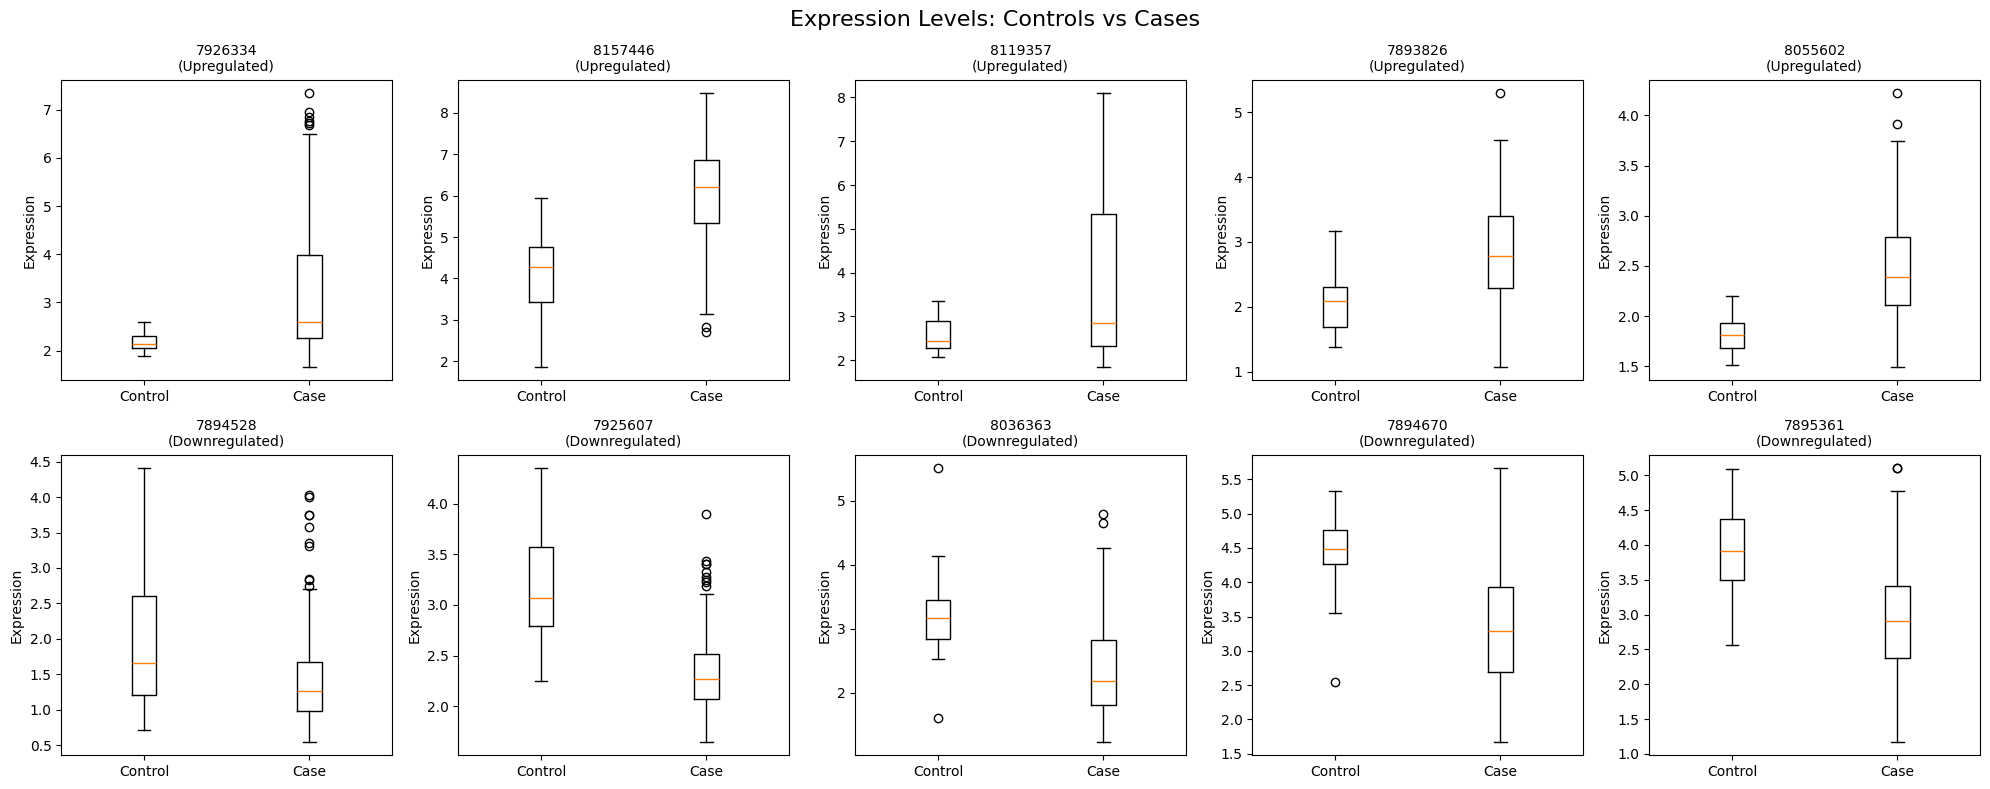


✓ Plotted top 5 upregulated and top 5 downregulated genes


In [40]:
# Visualize expression distribution for a few example genes
import matplotlib.pyplot as plt

print("EXPRESSION DISTRIBUTION: Example Genes")
print("=" * 60)

if 'parsed_df' in locals() and 'expr_df' in locals() and 'disease state' in parsed_df.columns:
    controls = [s for s in parsed_df[parsed_df['disease state'] == 'control'].index if s in expr_df.columns]
    cases = [s for s in parsed_df[parsed_df['disease state'] == 'Idiopathic Pulmonary Fibrosis'].index if s in expr_df.columns]
    
    if len(controls) > 0 and len(cases) > 0 and 'comparison_df' in locals():
        # Get top 5 most differentially expressed genes
        top_5_up = comparison_df.nlargest(5, 'log2_fold_change').index.tolist()
        top_5_down = comparison_df.nsmallest(5, 'log2_fold_change').index.tolist()
        
        # Plot expression for these genes
        fig, axes = plt.subplots(2, 5, figsize=(20, 8))
        fig.suptitle('Expression Levels: Controls vs Cases', fontsize=16)
        
        # Upregulated genes
        for i, gene_id in enumerate(top_5_up):
            ax = axes[0, i]
            control_vals = expr_df.loc[gene_id, controls].values
            case_vals = expr_df.loc[gene_id, cases].values
            
            ax.boxplot([control_vals, case_vals], labels=['Control', 'Case'])
            ax.set_title(f'{gene_id}\n(Upregulated)', fontsize=10)
            ax.set_ylabel('Expression')
        
        # Downregulated genes
        for i, gene_id in enumerate(top_5_down):
            ax = axes[1, i]
            control_vals = expr_df.loc[gene_id, controls].values
            case_vals = expr_df.loc[gene_id, cases].values
            
            ax.boxplot([control_vals, case_vals], labels=['Control', 'Case'])
            ax.set_title(f'{gene_id}\n(Downregulated)', fontsize=10)
            ax.set_ylabel('Expression')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ Plotted top 5 upregulated and top 5 downregulated genes")
    else:
        print("Need to run comparison cell first!")
else:
    print("Load data first!")


In [45]:
# Parse Platform Annotation from SOFT file (already downloaded)
print("PARSING PLATFORM ANNOTATION FROM SOFT FILE:")
print("=" * 60)

import gzip

# Get platform ID and dataset from phenotype data
if 'pheno_df' in locals() and 'Platform Id' in pheno_df.columns:
    platform_id = pheno_df['Platform Id'].iloc[0]
    print(f"Platform ID: {platform_id}")
    print(f"Dataset: {dataset}")
    
    # Read the SOFT file we already downloaded
    soft_file = data_dir / f'{dataset}_family.soft.gz'
    
    if soft_file.exists():
        print(f"\nReading SOFT file: {soft_file.name}")
        
        try:
            with gzip.open(soft_file, 'rt', encoding='utf-8') as f:
                soft_content = f.read()
            
            print("✓ SOFT file read successfully")
            
            # Parse SOFT file to extract probe-to-gene mapping from platform section
            probe_to_gene = {}
            lines = soft_content.split('\n')
            in_platform_table = False
            headers = []
            
            for line in lines:
                # Look for platform table section
                if line.startswith('^PLATFORM'):
                    # Platform section starts
                    in_platform_table = False
                    headers = []
                elif line.startswith('!platform_table_begin'):
                    in_platform_table = True
                    continue
                elif line.startswith('!platform_table_end') or (line.startswith('^') and in_platform_table):
                    # End of platform table or start of new section
                    if in_platform_table:
                        break
                    in_platform_table = False
                    headers = []
                elif in_platform_table:
                    if not headers:
                        # First line after table_begin is headers
                        headers = [h.strip() for h in line.split('\t')]
                        print(f"\nPlatform table columns found: {len(headers)} columns")
                        print(f"  First 10: {headers[:10]}")
                    else:
                        # Data rows
                        values = line.split('\t')
                        if len(values) >= len(headers):
                            # Handle cases where there might be extra tabs
                            row_dict = dict(zip(headers, values[:len(headers)]))
                            
                            # Try different ID column names
                            probe_id = None
                            for id_col in ['ID', 'id', 'ID_REF', 'ProbeID', 'PROBE_ID', 'probe_id']:
                                if id_col in row_dict:
                                    probe_id = row_dict[id_col].strip()
                                    break
                            
                            if not probe_id:
                                continue
                            
                            # Try to find gene symbol in various possible columns
                            gene_symbol = None
                            
                            # First, try gene_assignment column (common in Affymetrix platforms)
                            if 'gene_assignment' in row_dict and row_dict['gene_assignment'].strip() and row_dict['gene_assignment'].strip() != '---':
                                gene_assign = row_dict['gene_assignment'].strip()
                                # Parse format: "NM_001005240 // OR4F17 // olfactory receptor..."
                                # Gene symbol is typically the second field after //
                                parts = [p.strip() for p in gene_assign.split('//')]
                                if len(parts) >= 2:
                                    gene_symbol = parts[1]  # Second field is usually gene symbol
                            
                            # Fallback to other column names
                            if not gene_symbol:
                                for col in ['Gene Symbol', 'GENE_SYMBOL', 'Symbol', 'GENE', 'Gene', 'gene_symbol', 
                                           'GeneName', 'GENE_NAME', 'gene_name']:
                                    if col in row_dict and row_dict[col].strip() and row_dict[col].strip() != '---':
                                        gene_symbol = row_dict[col].strip()
                                        break
                            
                            # Also try Gene Title or Gene Name
                            if not gene_symbol:
                                for col in ['Gene Title', 'GENE_TITLE', 'Gene Name', 'GENE_NAME', 'gene_title', 
                                           'GeneDescription', 'Description']:
                                    if col in row_dict and row_dict[col].strip() and row_dict[col].strip() != '---':
                                        gene_symbol = row_dict[col].strip()
                                        break
                            
                            if probe_id and gene_symbol:
                                # Handle multiple genes separated by /// or ;
                                genes = [g.strip() for g in gene_symbol.replace('///', ';').split(';') if g.strip() and g.strip() != '---']
                                if genes:
                                    probe_to_gene[probe_id] = genes[0]  # Take first gene if multiple
            
            print(f"\n✓ Mapped {len(probe_to_gene)} probes to genes")
            if len(probe_to_gene) > 0:
                print(f"  Example mappings:")
                for i, (probe, gene) in enumerate(list(probe_to_gene.items())[:5]):
                    print(f"    {probe} -> {gene}")
            else:
                print("  ⚠ Warning: No probe-to-gene mappings found in platform table!")
                print("  Checking if gene info is in sample table...")
                
                # Sometimes gene info is in the sample table instead
                in_sample_table = False
                sample_headers = []
                for line in lines:
                    if line.startswith('^SAMPLE'):
                        in_sample_table = False
                        sample_headers = []
                    elif line.startswith('!sample_table_begin'):
                        in_sample_table = True
                        continue
                    elif line.startswith('!sample_table_end') or (line.startswith('^') and in_sample_table):
                        if in_sample_table:
                            break
                        in_sample_table = False
                        sample_headers = []
                    elif in_sample_table:
                        if not sample_headers:
                            sample_headers = [h.strip() for h in line.split('\t')]
                        else:
                            values = line.split('\t')
                            if len(values) >= len(sample_headers):
                                row_dict = dict(zip(sample_headers, values[:len(sample_headers)]))
                                # Look for ID_REF or similar in sample table
                                probe_id = row_dict.get('ID_REF', '').strip()
                                if probe_id:
                                    # Check for gene info
                                    for col in ['Gene Symbol', 'GENE_SYMBOL', 'Symbol', 'GENE']:
                                        if col in row_dict and row_dict[col].strip():
                                            probe_to_gene[probe_id] = row_dict[col].strip()
                                            break
                
                if len(probe_to_gene) > 0:
                    print(f"  ✓ Found {len(probe_to_gene)} mappings in sample table")
                else:
                    print("  ✗ No gene mappings found in SOFT file")
                    print("  You may need to download the platform annotation file separately")
            
            # Create mapping DataFrame
            if len(probe_to_gene) > 0:
                probe_gene_df = pd.DataFrame(list(probe_to_gene.items()), columns=['probe_id', 'gene_symbol'])
                probe_gene_df = probe_gene_df.set_index('probe_id')
            else:
                probe_gene_df = None
        except Exception as e:
            print(f"✗ Error reading/parsing SOFT file: {e}")
            import traceback
            traceback.print_exc()
            probe_gene_df = None
    else:
        print(f"✗ SOFT file not found: {soft_file}")
        print(f"  Expected location: {soft_file}")
        print(f"  Make sure you've run the download script first!")
        probe_gene_df = None
else:
    print("Load phenotype data first to get Platform ID!")
    probe_gene_df = None


PARSING PLATFORM ANNOTATION FROM SOFT FILE:
Platform ID: GPL11532
Dataset: GSE93606

Reading SOFT file: GSE93606_family.soft.gz
✓ SOFT file read successfully

Platform table columns found: 12 columns
  First 10: ['ID', 'GB_LIST', 'SPOT_ID', 'seqname', 'RANGE_GB', 'RANGE_STRAND', 'RANGE_START', 'RANGE_STOP', 'total_probes', 'gene_assignment']

✓ Mapped 22148 probes to genes
  Example mappings:
    7896740 -> OR4F17
    7896742 -> SEPT14
    7896744 -> OR4F16
    7896750 -> GPAM
    7896754 -> LOC100287934
